<a href="https://colab.research.google.com/github/TRUONGLETHANHVY/HOMEWORK_AI/blob/main/FACE_EMOTION_RECOGNIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import load_img,img_to_array,to_categorical
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir='/content/drive/MyDrive/FACEEEEEE'
val_dir='/content/drive/MyDrive/FACEEEEEE'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    brightness_range=[0.8,1.2],)

val_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical')
val_generator=val_datagen.flow_from_directory(
    val_dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical')


model=Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')])


Found 21 images belonging to 3 classes.
Found 21 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [3]:
history = model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=100,validation_data=val_generator,validation_steps=len(val_generator))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.2857 - loss: 1.1407 - val_accuracy: 0.4762 - val_loss: 0.9983
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4762 - loss: 0.9995 - val_accuracy: 0.4762 - val_loss: 0.9442
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4762 - loss: 1.0043 - val_accuracy: 0.8095 - val_loss: 0.8821
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.6667 - loss: 0.9136 - val_accuracy: 0.8095 - val_loss: 0.8130
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6667 - loss: 0.8789 - val_accuracy: 0.4762 - val_loss: 0.7674
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6190 - loss: 0.8046 - val_accuracy: 0.7143 - val_loss: 0.7160
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.7619 - loss: 0.7699 - val_accuracy: 0.8095 - val_loss: 0.5819
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7143 - loss: 0.6344 - val_accuracy: 0.7619 - val_loss: 0.5295
Epoch 9/

In [7]:
from tensorflow.keras.callbacks import EarlyStopping

train_emotion = '/content/drive/MyDrive/EMOOOOOOO'
val_emotion = '/content/drive/MyDrive/EMOOOOOOO'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    brightness_range=[0.8,1.2],)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator_emotion = train_datagen.flow_from_directory(train_emotion,target_size=(96,96),batch_size=32,class_mode='categorical')

val_generator_emotion = val_datagen.flow_from_directory(
    val_emotion,
    target_size=(96,96),
    batch_size=32,
    class_mode='categorical')


model_emotion = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator_emotion.num_classes, activation='softmax')])

# Compile the model before training
model_emotion.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Define early_stop before using it in model.fit
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_emotion.fit(
    train_generator_emotion,
    steps_per_epoch=len(train_generator_emotion),
    epochs=100,
    validation_data=val_generator_emotion,
    validation_steps=len(val_generator_emotion),
    callbacks=[early_stop]) # Now early_stop is defined and can be used here

Found 49 images belonging to 3 classes.
Found 49 images belonging to 3 classes.
Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step - accuracy: 0.3731 - loss: 3.9730 - val_accuracy: 0.4694 - val_loss: 1.3136
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.4284 - loss: 10.6106 - val_accuracy: 0.4694 - val_loss: 1.2306
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 4s/step - accuracy: 0.3173 - loss: 7.5579 - val_accuracy: 0.2449 - val_loss: 1.2683
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.3731 - loss: 4.3522 - val_accuracy: 0.2449 - val_loss: 1.2663
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 4s/step - accuracy: 0.5166 - loss: 4.7462 - val_accuracy: 0.3469 - val_loss: 1.0943
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.4556 - loss: 3.6124 - val_accuracy: 0.4286 - val_loss: 1.0778
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.3898 - loss: 4.3843 - val_accuracy: 0.4490 - val_loss: 1.0715
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 5s/step -

In [8]:
model_emotion.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [9]:
history = model_emotion.fit(
    train_generator_emotion,
    steps_per_epoch=len(train_generator_emotion),
    epochs=100,
    validation_data=val_generator_emotion,
    validation_steps=len(val_generator_emotion),
    callbacks=[early_stop])

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.4179 - loss: 4.6174 - val_accuracy: 0.2653 - val_loss: 2.0708
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 4s/step - accuracy: 0.4230 - loss: 5.9913 - val_accuracy: 0.3878 - val_loss: 1.6463
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.5514 - loss: 4.2047 - val_accuracy: 0.2857 - val_loss: 3.3815
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.3867 - loss: 6.0598 - val_accuracy: 0.2857 - val_loss: 4.3654
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5893 - loss: 3.3743 - val_accuracy: 0.2857 - val_loss: 4.8835
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 5s/step - accuracy: 0.4366 - loss: 2.8704 - val_accuracy: 0.2857 - val_loss: 5.1048
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.5166 - loss: 2.6754 - val_accuracy: 0.2857 - val_loss: 5.4108
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.3939 - loss: 2.8971 - val_accuracy: 0.2857 - val_loss: 6.4836
Epoch 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Text(0.5, 1.0, 'THANH VYYYY ĐANG RẤT HAPPY')

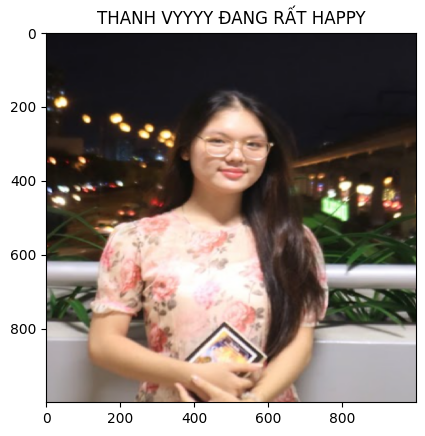

In [23]:
img = load_img('/thanhvyy.png', target_size=(1000, 1000))
plt.imshow(img),

img = img.resize((96, 96))
img_array = img_to_array(img) / 255.0
img_array = img_array.reshape(1, 96, 96, 3)

prediction_emotion = model_emotion.predict(img_array)
class_names = list(train_generator_emotion.class_indices.keys())
predicted_class_emotion = class_names[np.argmax(prediction_emotion)]

img_face = img.resize((64, 64))
img_array_face = img_to_array(img_face) / 255.0
img_array_face = img_array_face.reshape(1, 64, 64, 3)
prediction = model.predict(img_array_face)
class_names_face = list(train_generator.class_indices.keys())
predicted_class_face = class_names_face[np.argmax(prediction)]


plt.title(f'{predicted_class_face} ĐANG RẤT {predicted_class_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Text(0.5, 1.0, 'NHUNG TỒ ĐANG RẤT WOW')

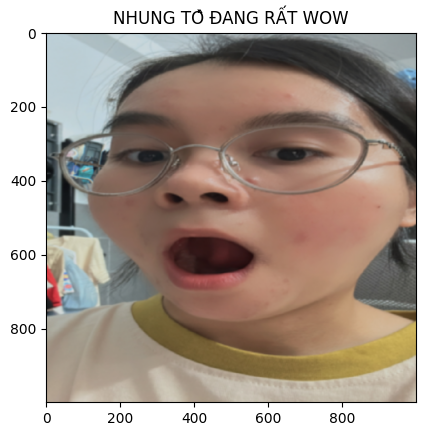

In [27]:
img = load_img('/Screenshot 2025-04-21 211223.png', target_size=(1000, 1000))
plt.imshow(img),

img = img.resize((96, 96))
img_array = img_to_array(img) / 255.0
img_array = img_array.reshape(1, 96, 96, 3)

prediction_emotion = model_emotion.predict(img_array)
class_names = list(train_generator_emotion.class_indices.keys())
predicted_class_emotion = class_names[np.argmax(prediction_emotion)]

img_face = img.resize((64, 64))
img_array_face = img_to_array(img_face) / 255.0
img_array_face = img_array_face.reshape(1, 64, 64, 3)
prediction = model.predict(img_array_face)
class_names_face = list(train_generator.class_indices.keys())
predicted_class_face = class_names_face[np.argmax(prediction)]


plt.title(f'{predicted_class_face} ĐANG RẤT {predicted_class_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Text(0.5, 1.0, 'HÀ HÂM ĐANG RẤT WOW')

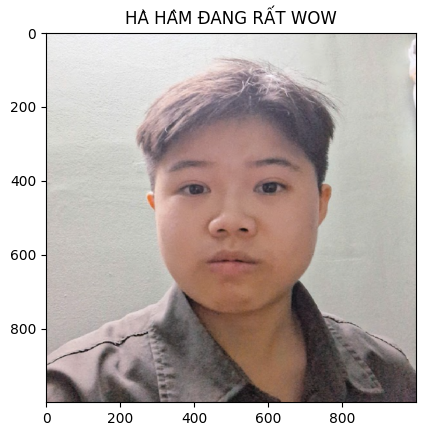

In [24]:
img = load_img('/sephaa.png', target_size=(1000, 1000))
plt.imshow(img),

img = img.resize((96, 96))
img_array = img_to_array(img) / 255.0
img_array = img_array.reshape(1, 96, 96, 3)

prediction_emotion = model_emotion.predict(img_array)
class_names = list(train_generator_emotion.class_indices.keys())
predicted_class_emotion = class_names[np.argmax(prediction_emotion)]

img_face = img.resize((64, 64))
img_array_face = img_to_array(img_face) / 255.0
img_array_face = img_array_face.reshape(1, 64, 64, 3)
prediction = model.predict(img_array_face)
class_names_face = list(train_generator.class_indices.keys())
predicted_class_face = class_names_face[np.argmax(prediction)]


plt.title(f'{predicted_class_face} ĐANG RẤT {predicted_class_emotion}')